## Importing Libraries

Let's import the libraries needed for analyzing the data

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

Load the data into a dataframe using the given fetch_california_housing function

In [88]:
housing = fetch_california_housing(as_frame=True)

# predictors, predictor_names = housing['data'], housing['feature_names']
# target, target_name = housing['target'], housing['target_names']

# full_data = np.column_stack((predictors, target))
# columns = predictor_names + target_name

# housing.frame = pd.DataFrame(full_data)
# housing.frame.columns = columns

housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Information about the dataset

In [102]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [90]:
housing.frame.rename(columns={'AveRooms': 'AvgRooms', 'AveBedrms': 'AvgBedrms', 'AveOccup': 'AvgOccup'}, inplace=True)

Info regarding the columns of the dataset and number of non null and null values

In [91]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AvgRooms     20640 non-null  float64
 3   AvgBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AvgOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [92]:
housing.frame.isna().sum()

MedInc         0
HouseAge       0
AvgRooms       0
AvgBedrms      0
Population     0
AvgOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Descriptive statistics of the data

In [93]:
housing.frame.describe(include='all')

,MedInc,HouseAge,AvgRooms,AvgBedrms,Population,AvgOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Heatmap of the pearson correlation matrix for the dataset columns

<Axes: >

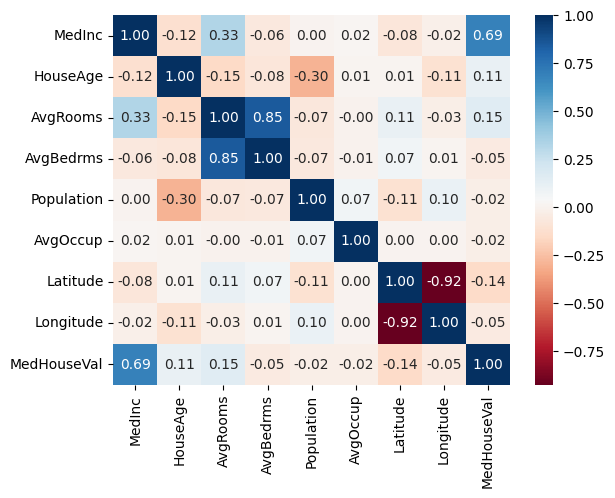

In [94]:
sns.heatmap(housing.frame.corr(), annot=True, fmt='.2f', cmap='RdBu')

We can see a moderately strong positive linear relationship between median income and median house value, with a max of $500,000 (likely an artificial cap)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

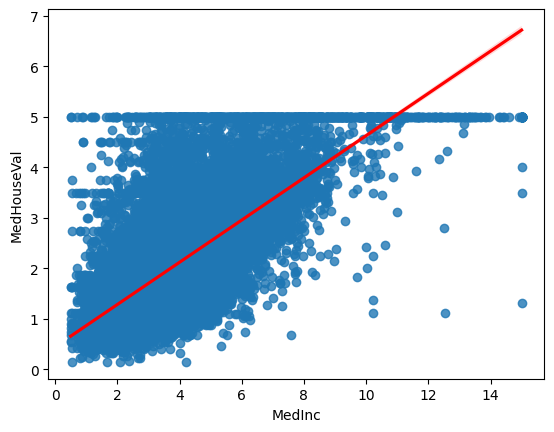

In [95]:
sns.regplot(data=housing.frame, x='MedInc', y='MedHouseVal', line_kws={'color': 'Red'})

Let's check the distributions of the columns using histograms as well as kernel density estimations

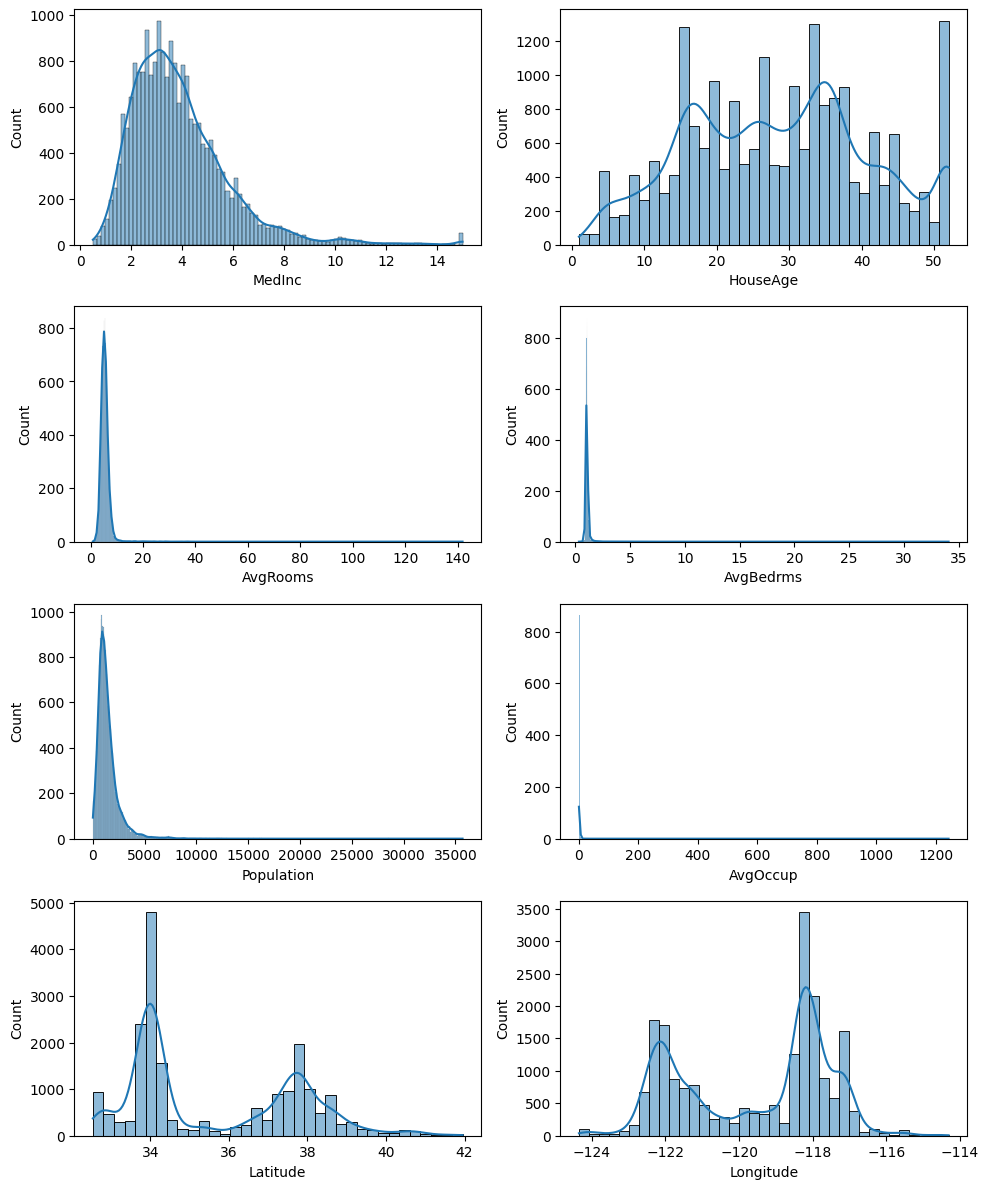

In [96]:
fig, ax = plt.subplots(figsize=(10, 12), nrows=int(np.ceil(len(housing.frame.columns)) / 2), ncols=2)

for col, axis in zip(housing.frame.columns, ax.flatten()):
    sns.histplot(housing.frame[col], kde=True, ax=axis)

plt.tight_layout()
plt.show()

Generating a new column that has bins low, medium and high for the target variable median house value

In [97]:
labels = ['low', 'medium', 'high']
bins = np.linspace(housing.frame['MedHouseVal'].min(), housing.frame['MedHouseVal'].max(), 4)

housing.frame['MedHouseValueRange'] = np.digitize(housing.frame['MedHouseVal'], bins, right=True)
housing.frame['MedHouseValueRange'] = housing.frame['MedHouseValueRange'].map({i: label for i, label in enumerate(labels, start=1)})

housing.frame.head()

,MedInc,HouseAge,AvgRooms,AvgBedrms,Population,AvgOccup,Latitude,Longitude,MedHouseVal,MedHouseValueRange
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,high
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,high
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,high
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,high
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,high


Generating some boxplots for the low, medium and high bins vs. the rest of the columns in the dataset. We can see the effect that a bunch of outliers have on the boxplots.

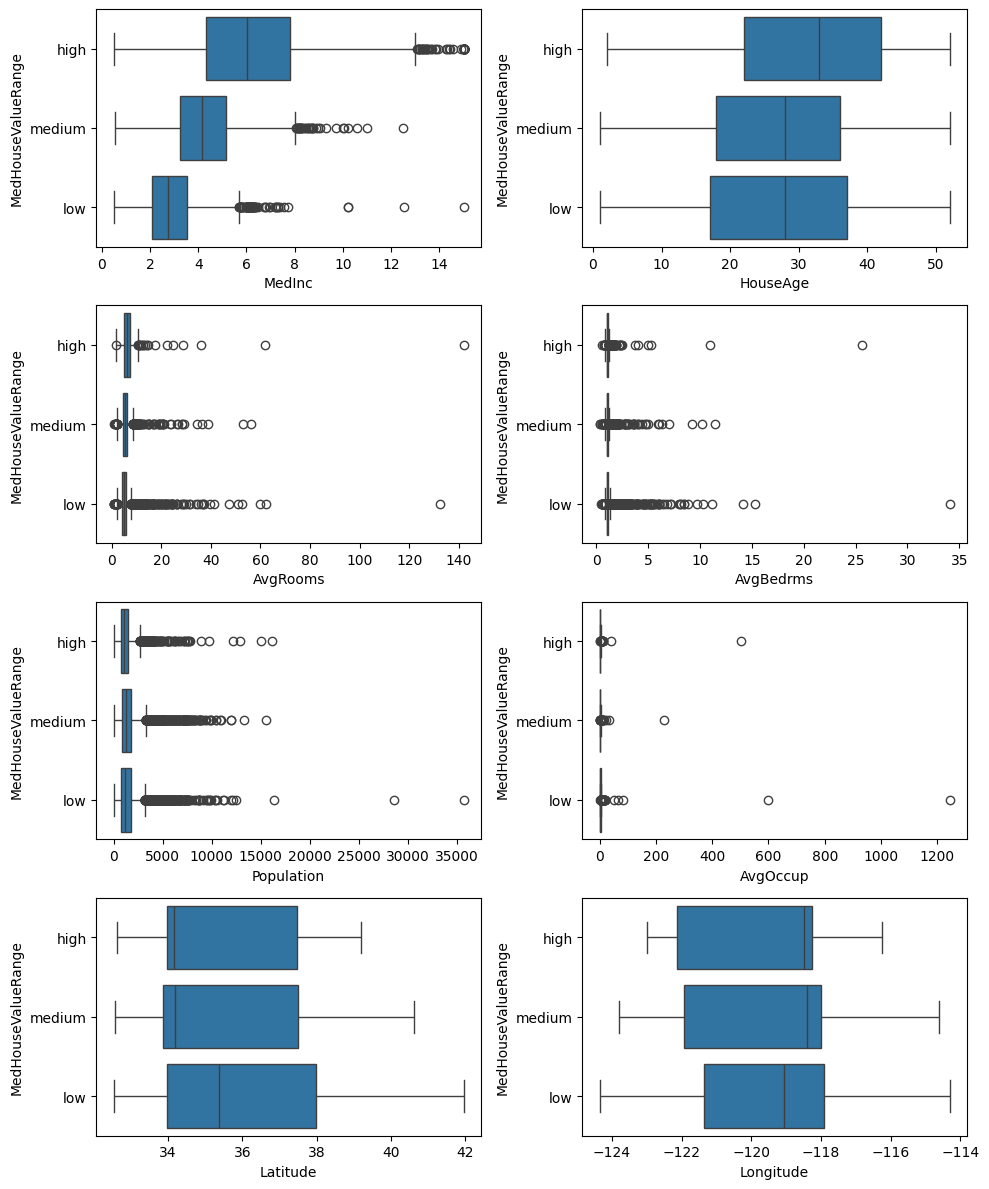

In [98]:
# sns.boxplot(data=housing.frame, x='AvgOccup', y='MedHouseValueRange')

columns_for_box_plot = housing.frame.drop(columns=['MedHouseVal', 'MedHouseValueRange'], axis=1).columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(columns_for_box_plot) / 2)), ncols=2, figsize=(10, 12))

for column, axis in zip(columns_for_box_plot, ax.flatten()):
    sns.boxplot(data=housing.frame, x=column, y='MedHouseValueRange', ax=axis)

plt.tight_layout()
plt.show()

For the latitude and longitude values, let's create a scatterplot that includes the median house values to see if there are any
significant relationships between location and median house value

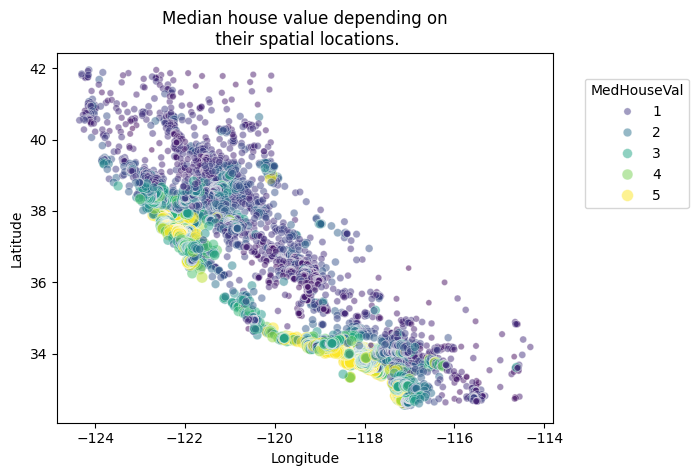

In [107]:
sns.scatterplot(
    data=housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)

plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on\n their spatial locations.")

We can see that this plot roughly illustrates the shape of California itself! We can see houses are more expensive on the coast generally, with more inexpensive houses everywhere else.

Let's do some random sampling of a subset of the data to get a better look

In [110]:
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(housing.frame.shape[0]), size=500, replace=False
)

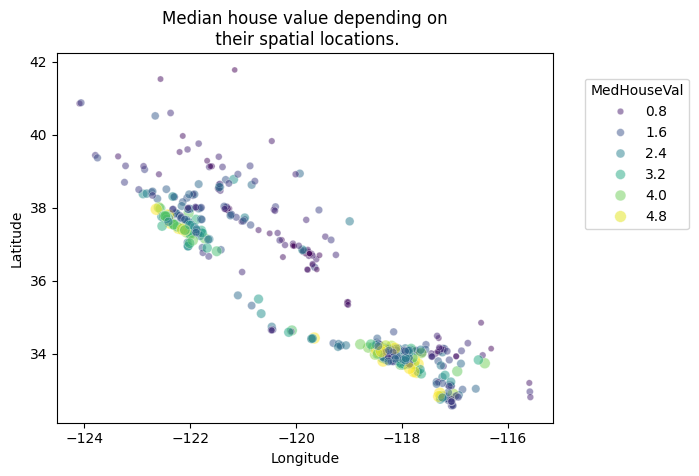

In [111]:
sns.scatterplot(
    data=housing.frame.iloc[indices],
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)

plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on\n their spatial locations.")

We can make a final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

In [113]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = housing.frame.iloc[indices].drop(columns_drop, axis=1)
# Quantize the target and keep the midpoint for each interval
subset['MedHouseVal'] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset['MedHouseVal'] = subset['MedHouseVal'].apply(lambda x: x.mid)

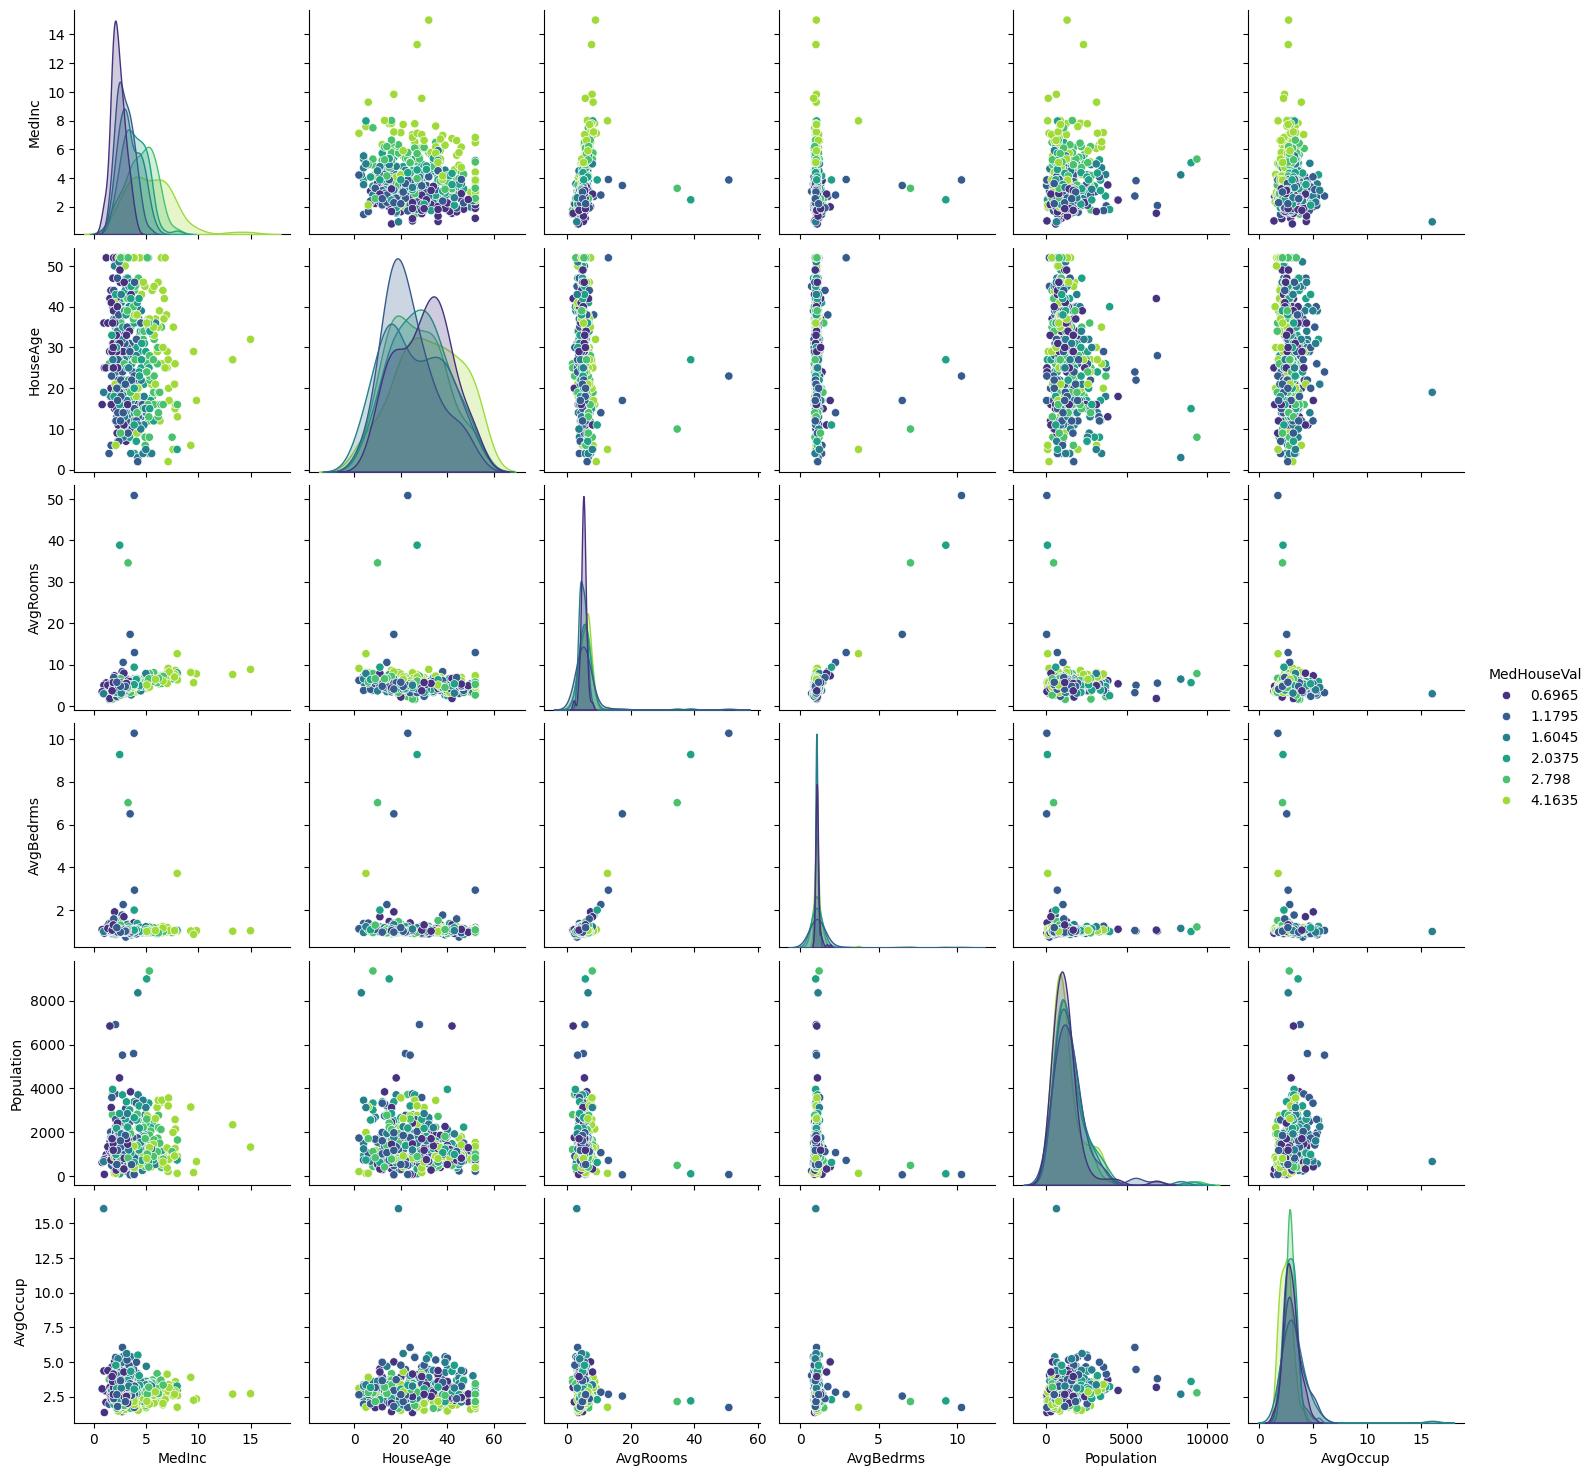

In [114]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    housing.data,
    housing.target,
    return_estimator = True,
    n_jobs = 2
)

In [116]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [117]:
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=housing.feature_names,
)

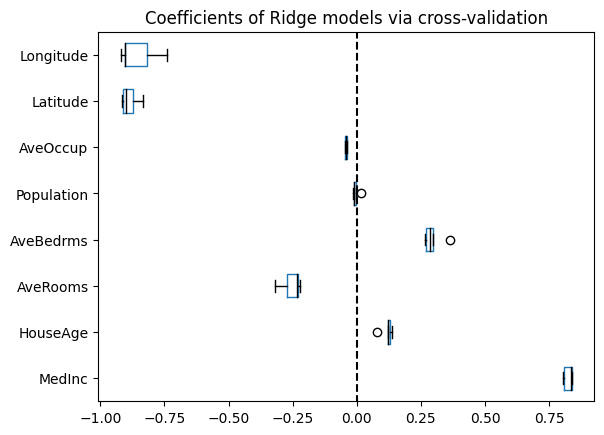

In [118]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models via cross-validation")